In [1]:
from google.colab import drive
from google.colab import runtime
import pickle
import matplotlib.pyplot as plt
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
SIZE_TITLE = 24
SIZE_LABELS = 24
SIZE_TICKS = 18
SIZE_LEGEND = 18

In [3]:
!pip install gdown
!pip install -U pysal
!pip install geopandas
!pip install torch_geometric pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install torch-geometric-temporal
!pip install --upgrade --force-reinstall git+https://github.com/FelipeSchreiber/COE770_Machine_Learning_on_Graphs.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/FelipeSchreiber/COE770_Machine_Learning_on_Graphs.git to /tmp/pip-req-build-c2llyvnm
  Running command git clone --filter=blob:none --quiet https://github.com/FelipeSchreiber/COE770_Machine_Learning_on_Graphs.git /tmp/pip-req-build-c2llyvnm
  Resolved https://github.com/FelipeSchreiber/COE770_Machine_Learning_on

In [4]:
from Tests.benchmark import *
from Tests.utils import *
benchmark = CovidBenchmark()
gammas=np.logspace(1,6,num=3).astype(int)
filters = [2,4,8]

In [5]:
stats = benchmark.run_DCRNN_covid(lags=4,train_model=True,filter_sizes = [2,4],\
                              num_epochs=1,output_size=32)
with open('covid_DCRNN_stats.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/covid_DCRNN_stats.pickle" "/content/drive/MyDrive"
test_0=None
with open("/content/drive/MyDrive/covid_DCRNN_stats.pickle", 'rb') as handle:
    test_0 = pickle.load(handle)
test_0.keys()

100%|██████████| 1/1 [00:29<00:00, 29.62s/it]


dict_keys(['MSE', 'model', 'filter_size'])

In [7]:
test_0

{'MSE': [137546891.10526314, 138374290.52631578],
 'model': ['DCRNN', 'DCRNN'],
 'filter_size': [2, 4]}

100%|██████████| 1/1 [00:03<00:00,  3.06s/it]


1.0855355002881528
ADCRNN
MY_ADCRNN_(
  (recurrent): ADCRNN(
    (conv_x_z): ADConv(36, 32)
    (conv_x_r): ADConv(36, 32)
    (conv_x_h): ADConv(36, 32)
    (PReLU_layer): PReLU(num_parameters=1)
  )
  (linear): Linear(in_features=32, out_features=1, bias=True)
)


100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


1.041323317340217
TGCN
MY_TGCN_(
  (recurrent): TGCN(
    (conv_z): GCNConv(4, 32)
    (linear_z): Linear(in_features=64, out_features=32, bias=True)
    (conv_r): GCNConv(4, 32)
    (linear_r): Linear(in_features=64, out_features=32, bias=True)
    (conv_h): GCNConv(4, 32)
    (linear_h): Linear(in_features=64, out_features=32, bias=True)
  )
  (linear): Linear(in_features=32, out_features=1, bias=True)
)


100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


1.0661481170592686
AGCRN
MY_AGCRN_(
  (recurrent): AGCRN(
    (_gate): AVWGCN()
    (_update): AVWGCN()
  )
  (linear): Linear(in_features=32, out_features=1, bias=True)
)


100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


1.0544011301647584
DCRNN
MY_DCRNN_(
  (recurrent): DCRNN(
    (conv_x_z): DConv(36, 32)
    (conv_x_r): DConv(36, 32)
    (conv_x_h): DConv(36, 32)
  )
  (linear): Linear(in_features=32, out_features=1, bias=True)
)


100%|██████████| 1/1 [00:03<00:00,  3.65s/it]


1.060603110657002
GConvGRU
MY_GConvGRU_(
  (recurrent): GConvGRU(
    (conv_x_z): ChebConv(4, 32, K=2, normalization=sym)
    (conv_h_z): ChebConv(32, 32, K=2, normalization=sym)
    (conv_x_r): ChebConv(4, 32, K=2, normalization=sym)
    (conv_h_r): ChebConv(32, 32, K=2, normalization=sym)
    (conv_x_h): ChebConv(4, 32, K=2, normalization=sym)
    (conv_h_h): ChebConv(32, 32, K=2, normalization=sym)
  )
  (linear): Linear(in_features=32, out_features=1, bias=True)
)


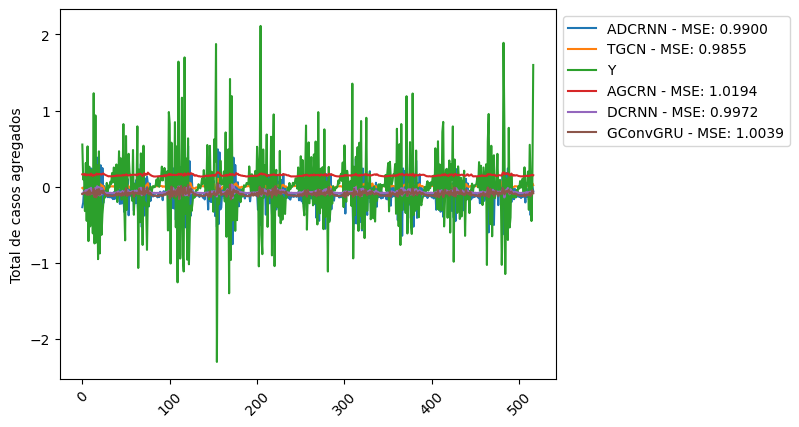

dict_keys(['MSE', 'model'])

In [14]:
stats_all,stats_test = benchmark.run_test_other_models(lags=4,train_model=True,filter_size=2,\
                              num_epochs=1,output_size=32,make_plot=True)
with open('chickenpox_other_algos.pickle', 'wb') as handle:
    pickle.dump(stats_all, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/chickenpox_other_algos.pickle" "/content/drive/MyDrive"
test_all=None
with open("/content/drive/MyDrive/chickenpox_other_algos.pickle", 'rb') as handle:
    test_all = pickle.load(handle)
test_all.keys()

In [ ]:
stats = benchmark.run_test(lags=4,filter_sizes=filters,\
                           train_model=True,\
                           gammas=gammas,\
                           num_epochs=1,\
                           warm_start=False)
with open('covid_test_0.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/covid_test_0.pickle" "/content/drive/MyDrive"
test_0=None
with open("/content/drive/MyDrive/covid_test_0.pickle", 'rb') as handle:
    test_0 = pickle.load(handle)
test_0.keys()

In [13]:
test_0

{'MSE': [997887.5547767831,
  993187.6923364727,
  939560.6350595737,
  993224.0383074771,
  993499.8650559159,
  993226.6874311005,
  941139.0895529822,
  1040357.5631344679,
  917183.5947507465],
 'gamma': [10, 3162, 1000000, 10, 3162, 1000000, 10, 3162, 1000000],
 'filter_size': [2, 2, 2, 4, 4, 4, 8, 8, 8]}

In [10]:
xlabel="filter_size"
ylabel="gamma"
zlabel ="MSE"

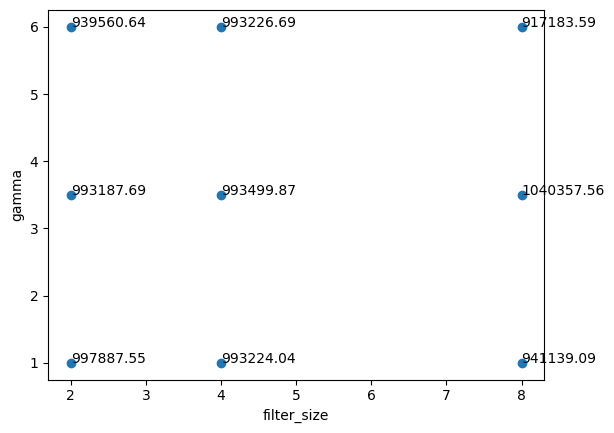

In [11]:
scatter_(test_0,xlabel,ylabel,zlabel)

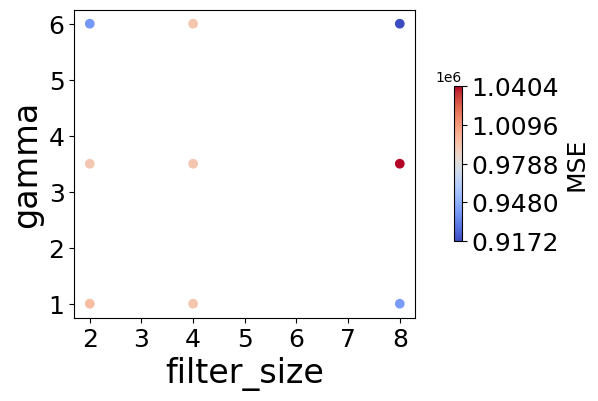

In [12]:
scatter_with_colorbar(test_0,xlabel,ylabel,zlabel)

In [ ]:
runtime.unassign()

In [ ]:
# loader = CovidDatasetLoader(method="other")
# dataset = loader.get_dataset(lags=4)
# # train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.8)
# i = 0
# fig = plt.figure(1, figsize=(8, 14), frameon=False, dpi=100)
# for filter_size, gamma in tqdm(product(filters,gammas)):
#   model = get_model(False,num_features=35,num_filters=filter_size,gamma=gamma)
#   model.to(device)
#   model.eval()
#   cost = 0
#   preds = []
#   y = []
#   for time, snapshot in enumerate(dataset):
#       snapshot.to(device)
#       y_hat,_ = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
#       preds.append(y_hat.sum().cpu().detach().numpy())
#       y.append(snapshot.y.sum().cpu().detach().numpy())
#       del snapshot
#   if i ==0:
#     plt.plot(y,label=f"Y")
#   plt.plot(preds,label=f"ADCRNN_{int(filter_size)}_{np.log10(gamma):.2f}")
#   i+=1
# plt.legend()
# plt.ylabel("Total de casos agregados")
# plt.xticks(rotation=45)
# plt.savefig("agg.jpg")
# plt.show()
# !cp "/content/agg.jpg" "/content/drive/MyDrive"